<img src="./logo_UNSAM.jpg" align="right" width="150" />

#### Análisis y Procesamiento de Señales

# Tarea semanal Nº 4
#### Tatiana Galansky, Guadalupe Cura

#### INTRODUCCIÓN TEÓRICA

   El análisis espectral permite medir, estimar y describir el contenido en frecuencia de señales tanto deterministas como aleatorias. El siguiente modelo de señal integra componentes determinísticos y estocásticos, un planteo habitual en el estudio de sistemas de naturaleza probabilística.
$$x[n] = a_0 \cdot \sin(\Omega_1 \cdot n) + n_a[n]$$
La señal de entrada $x[n]$ es una sinusoide cuya amplitud ($a_0=\sqrt{2}$) está calibrada para tener una potencia unitaria de 1 W, sumada a un ruido $n_a[n]$. El ruido es modelado como un proceso aleatorio con distribución normal ($\mathbf{n_a \sim N(0, \sigma^2)}$), y la relación Señal a Ruido (SNR) determina la dificultad para aislar y caracterizar la componente sinusoidal de interés. Esta última se define de la siguiente manera, donde el subíndice $s$ indica señal y $n$ indica ruido:
$$SNR_{dB}=10 log_{10}\frac{P_s}{P_n}     \qquad (1)$$
La frecuencia angular, $\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}$, introduce una complicación fundamental. Dado que el factor $f_r$ se extrae de una distribución uniforme continua ($\mathbf{f_r \sim U(-2, 2)}$), es altamente improbable que la frecuencia $\Omega_1$ coincida exactamente con uno de los puntos de muestreo de la Transformada Discreta de Fourier (DFT/FFT), conocida como la rejilla de frecuencias o frequency grid. Esta desalineación conduce directamente al fenómeno del desparramo espectral (spectral leakage).
La medición práctica del espectro de frecuencia se ve afectada por dos problemas fundamentales: el ventaneo de datos y el muestreo de frecuencias. Dado que solo se analiza una secuencia de longitud finita $N$ (1000 muestras), esto equivale a multiplicar la señal infinita por una ventana rectangular implícita. Esta operación en el dominio del tiempo resulta en una convolución en el dominio de la frecuencia entre el espectro ideal de la señal y el espectro de la ventana.
   Para mitigar el desparramo espectral, se utilizan funciones de ventana explícitas $w_i[n]$, como pueden ser la Flat-top, Blackman-Harris y Hamming.
   Se puede utilizar un proceso de estimación que se basa en el Periodograma Modificado. El periodograma es un estimador no paramétrico que utiliza la magnitud al cuadrado de la DTFT (o FFT) de la señal muestreada para aproximar la Densidad Espectral de Potencia (PSD) del proceso subyacente.
Los estimadores tanto de amplitud como de frecuencia son funciones de las realizaciones aleatorias de la señal ($f_r$ y $n_a$), por lo que deben ser evaluados estadísticamente. 
$$\hat{a}{i1} = |X{i,w}(\Omega_0)|    \qquad (2)$$ 
$$\hat{\Omega}{i1} = \arg \max{\Omega} {|X_{i,w}(\Omega)|}    \qquad (3)$$ 
El sesgo mide la precisión del estimador, definido como la diferencia entre el valor esperado del estimador y el valor verdadero del parámetro. 
$$s_a =\mathbb{E}{\hat{a}_{0}} - a_0      \qquad (4)$$ 
Un estimador con bajo sesgo tiende a apuntar al valor correcto a largo plazo. Se busca que el estimador sea asintóticamente insesgado, acercándose al valor real a medida que el número de muestras $N$ se incrementa.
La varianza mide la dispersión de las estimaciones. Un estimador con baja varianza es más consistente, es decir, sus realizaciones están menos dispersas alrededor de la media. El periodograma simple es conocido por ser asintóticamente insesgado pero no consistente. Para obtener una estimación consistente, se recurre al promedio de múltiples realizaciones.
   La parametrización para diferentes valores de SNR y la variación en las propiedades de las ventanas permitirán cuantificar la compensación entre el sesgo y la varianza de los estimadores. Típicamente, las ventanas con baja fuga (ej. Blackman-Harris) sacrifican precisión en el bin de frecuencia para reducir el sesgo introducido por el leakage y el ruido.




#### ANÁLISIS Y DESARROLLO
   Para comenzar con la tarea semanal, primero se definió una señal senoidal y se graficó su transformada rápida de Fourier. 

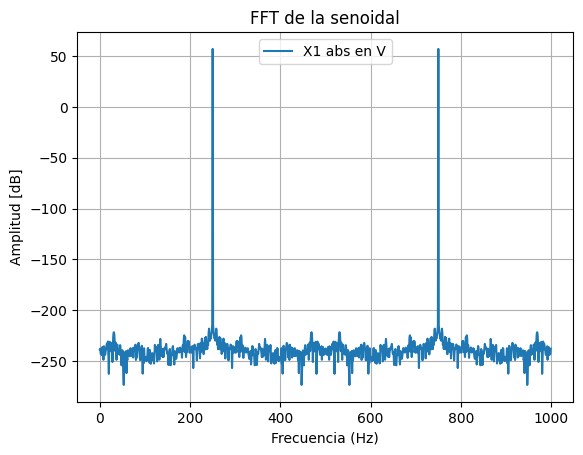

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows
from numpy.fft import fft, fftshift, fftfreq

#senoidal normal con fs=N/4

fs=1000 #en Hz
N=1000 #muestras
df=fs/N #resolucion espectral,en Hz

amp=np.sqrt(2) #es para normalizar a 1 la potencia, en Volts

def sen(ff,nn,amp=amp, dc=0, ph=0, fs=2):
    n=np.arange(nn)
    t=n/fs
    x=dc+amp*np.sin(2*np.pi*ff*t+ph)
    return t,x

t1,s1= sen(ff=(fs/4), nn=N, fs=fs)

S1=fft(s1)
S1abs=np.abs(S1)

ff= np.arange(N)*df
plt.figure(1)
plt.plot(ff,np.log10(S1abs)*20, label='X1 abs en V' )
plt.title('FFT de la senoidal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show ()

   Como se puede ver en el gráfico, la transformada rápida de fourier nos muestra los dos deltas que encontramos para la transformada de la senoidal en $ff=\frac{fs}{4}$ y en $N-ff$. Por otro lado, también se puede identificar el piso, aproximadamente en $-250 dB$, de la función que hace referencia al valor mínimo que toma la $FFT$ convertido a dB.


   Para continuar, se le agregó ruido a las funciones. Para ello se definieron dos $SNR$ de $3 dB$ y $10 dB$. Luego, despejando de la ecuación (1) se obtuvieron las potencias de rudo que fueron necesarias ya que la función ruido tiene como parámetro de entrada el desvío estándar, es decir, la raiz cuadrada de la varianza que es lo mismo que la raiz cuadrada de la potencia del ruido. 

In [17]:
SNR1=3 #en dB
SNR2=10 #en dB

pot_ruido1=amp**2/(2*10**(SNR1/10))
pot_ruido2=amp**2/(2*10**(SNR2/10))

print(f'La potencia del ruido para SNR=3 es {pot_ruido1:.3f}')
print(f'La potencia del ruido para SNR=10 es {pot_ruido2:.3f}')

ruido1=np.random.normal(0,np.sqrt(pot_ruido1),N) #pasas la raiz de la varianza ->desvío estandar
ruido2=np.random.normal(0,np.sqrt(pot_ruido2),N)

var_ruido1=np.var(ruido1)
var_ruido2=np.var(ruido2)

print(f'La potencia de ruido (varianza) para SNR=3 es {var_ruido1:.3f}')
print(f'La potencia del ruido (varianza) para SNR=10 es {var_ruido2:.3f}')

La potencia del ruido para SNR=3 es 0.501
La potencia del ruido para SNR=10 es 0.100
La potencia de ruido (varianza) para SNR=3 es 0.490
La potencia del ruido (varianza) para SNR=10 es 0.100


Este procedimiento sirvió para verificar por dos métodos distintos el valor de la potencia del ruido. 

Una vez definido el ruido, se lo suma a la señal original para así obtener la señal contaminada con ruido blanco, es decir, un ruido que tiene densidad espectral de potencia constante en todas las frecuencias y cuyas muestras son estadísticamente independientes y con distribución gaussiana de media cero. 

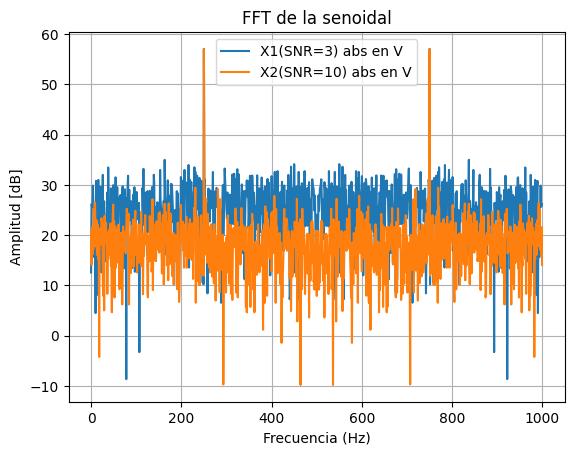

In [18]:
#------------------------------------------------
#Hago señal senoidal con ruido, la llamo x
x1=s1+ruido1
x2=s1+ruido2

X1=fft(x1)
X2=fft(x2)

X1abs=np.abs(X1)
X2abs=np.abs(X2)

plt.figure(2)
plt.plot(ff,20*np.log10(X1abs), label='X1(SNR=3) abs en V' )
plt.plot(ff,20*np.log10(X2abs), label='X2(SNR=10) abs en V' )
plt.title('FFT de la senoidal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show ()

#lo que se ve es un aumento en el ruido, de S1 a X1 y X2

Este gráfico nos permite ver que a medida que aumenta el ruido, es decir, que la SNR es menor, el piso de ruido aumenta en dB. Si se compara este gráfico con el antes obtenido de la transformada de la función senoidal, se puede ver que aunque los deltas mantengan su altura en dB y su posición en frecuencia, el piso ya deja de estar en $-250 dB$, para estar entre los $15 dB$ y los $25 dB$ para ambas señales ruidosas. Este resultado es importante, ya que nos muestra que el ruido puede ser predominante en una señal y, de esta manera, alterarla.
Esto mismo se observa en la siguiente parte del código donde se calcula la transformada del ruido y luego se pasa a dB para poder graficarla.

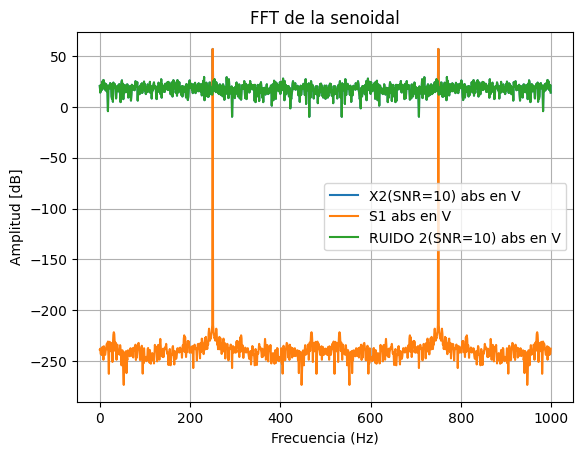

In [19]:
#-----------------------------------------------------
#veo que la suma entre la senoida, más el ruido, da la funcion ruidosa para SNR=10

#calculo la fft del ruido
RUIDO2=fft(ruido2)
RUIDO2abs=np.abs(RUIDO2)

plt.figure(3)
plt.plot(ff,20*np.log10(X2abs), label='X2(SNR=10) abs en V' )
plt.plot(ff,20*np.log10(S1abs), label='S1 abs en V' )
plt.plot(ff,20*np.log10(RUIDO2abs), label='RUIDO 2(SNR=10) abs en V' )
plt.title('FFT de la senoidal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show ()

#se ve que el orden de magnitud más alto tapa al de abajo. 

A modo de ejemplificación, se tomó únicamente la señal de $SNR=10$, pero lo mismo aplica para el caso en el cual el $SNR$ es $3$. Como vemos, el ruido es predominante, es por esto que el piso se desplaza hacia arriba mientras que los deltas se mantienen. 

Luego, se calibró el espectro para que tenga la misma escala que la señal en el dominio del tiempo. Si no se realiza esta calibración, la amplitud de la FFT queda escalada por el número de muestras $N$, y la energía en el dominio de la frecuencia no coincidiría con la energía en el dominio del tiempo, violando el principio de Parseval.
Para ello, se multiplicó la transformada rápida por $\frac{1}{N}$. Esta operación hace que las componentes espectrales tengan las mismas unidades físicas que la señal original (en este caso Volts). De esta manera, el módulo de la FFT representa directamente amplitudes de tensión.
Como la potencia se relaciona con la tensión mediante $P=\frac{V^2}{R}$ (asumiendo $R=1$), el cuadrado del módulo de la FFT calibrada representa la potencia espectral de la señal.
Finalmente, dado que la señal es real y su espectro es simétrico, si se considera solo el semi espectro (de 0 a la frecuencia de Nyquist), se multiplica el resultado por 2 para concentrar toda la energía en un delta. Esta operación equivale a sumar $+3 dB$ en términos de potencia.

<function matplotlib.pyplot.show(close=None, block=None)>

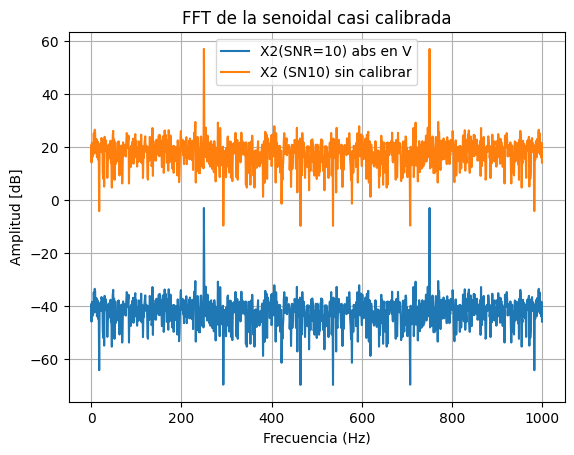

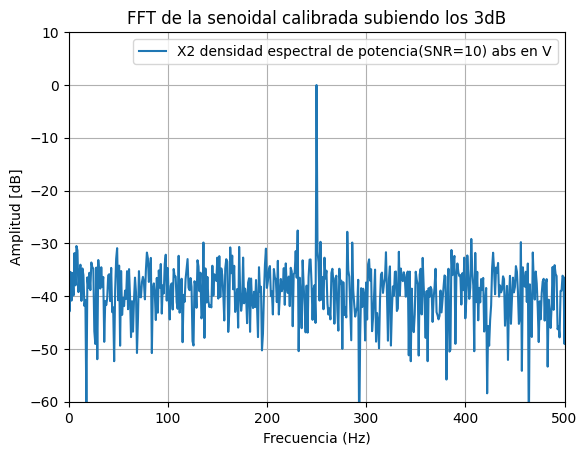

In [20]:
#AHORA CALIBRAMOS
X2_calib=(1/N)*fft(x2)


plt.figure(4)
plt.plot(ff,20*np.log10(np.abs(X2_calib)), label='X2(SNR=10) abs en V' )
plt.plot(ff, 20*np.log10(X2abs), label='X2 (SN10) sin calibrar')
plt.title('FFT de la senoidal casi calibrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud [dB]')
plt.legend()
plt.grid()
plt.show

#no esta en 0dB.
#-----------------------------------------------------

plt.figure(5)
plt.plot(ff,10*np.log10((2*np.abs(X2_calib)**2)), label='X2 densidad espectral de potencia(SNR=10) abs en V' ) #densidad espectral de potencia
plt.title('FFT de la senoidal calibrada subiendo los 3dB')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud [dB]')
plt.xlim(0,500) #hago de 0 a Nyquist
plt.ylim(-60,10)
plt.legend()
plt.grid()
plt.show

Posteriormente, se generaron diferentes ventanas (rectangular, Hamming, Blackman-Harris y Flat-top) y se aplicó el ventaneo de los datos de las señales senoidales con cada una de ellas. Teniendo en cuenta el procedimiento anterior, se desarrolló una implementación matricial que permite realizar 200 realizaciones por experimento, es decir, para cada tipo de ventana aplicada a la señal bajo las dos condiciones de ruido ($SNR=3$ y $SNR=10$).


In [21]:
fs = 1000
N = 1000
R = 200
fr = np.random.uniform(-2, 2, R)
deltaF = fs/N

SNR1 = 3
SNR2 = 10
a0 = 2
Omega0 = fs/4
ps = a0**2/2

pot_ruido1 = a0**2/(2*10**(SNR1/10))
pot_ruido2 = a0**2/(2*10**(SNR2/10))

#%% Matriz de senos
# Ventanas a usar
rectangular = windows.boxcar(N).reshape((-1,1))
hamming = windows.hamming(N).reshape((-1,1))
blackman_harris = windows.blackmanharris(N).reshape((-1,1))
flattop = windows.flattop(N).reshape((-1,1))

def ventaneo(x_ruido, vent):
    x_vent = x_ruido * vent
    X_vent = fft(x_vent, n=10*N, axis=0) 
    return X_vent

tt_vector = np.arange(N)/fs
tt_columnas = tt_vector.reshape((-1,1))
ff_filas = fr.reshape((1,-1))
TT_sen = np.tile(tt_columnas, (1,R))
FF_sen = np.tile(ff_filas, (N,1))
ruido1 = np.random.normal(loc=0, scale=np.sqrt(pot_ruido1), size=(N,R))
ruido2 = np.random.normal(loc=0, scale=np.sqrt(pot_ruido2), size=(N,R))

xx_sen = a0 * np.sin(2 * np.pi * (Omega0 + FF_sen * deltaF) * TT_sen)

xx_sen_ruido1 = xx_sen + ruido1
xx_sen_ruido2 = xx_sen + ruido2

# Calcular FFTs
XX_sen_ruido1 = fft(xx_sen_ruido1, n=10*N, axis=0)
XX_r1_rect = ventaneo(xx_sen_ruido1, rectangular)
XX_r1_ham = ventaneo(xx_sen_ruido1, hamming)
XX_r1_bh = ventaneo(xx_sen_ruido1, blackman_harris)
XX_r1_fl = ventaneo(xx_sen_ruido1, flattop)

XX_sen_ruido2 = fft(xx_sen_ruido2, n=10*N, axis=0)
XX_r2_rect = ventaneo(xx_sen_ruido2, rectangular)
XX_r2_ham = ventaneo(xx_sen_ruido2, hamming)
XX_r2_bh = ventaneo(xx_sen_ruido2, blackman_harris)
XX_r2_fl = ventaneo(xx_sen_ruido2, flattop)

A modo de ejemplo, se graficó una de estas realizaciones, en este caso la primera, para cada ventana y para cada ruido. 


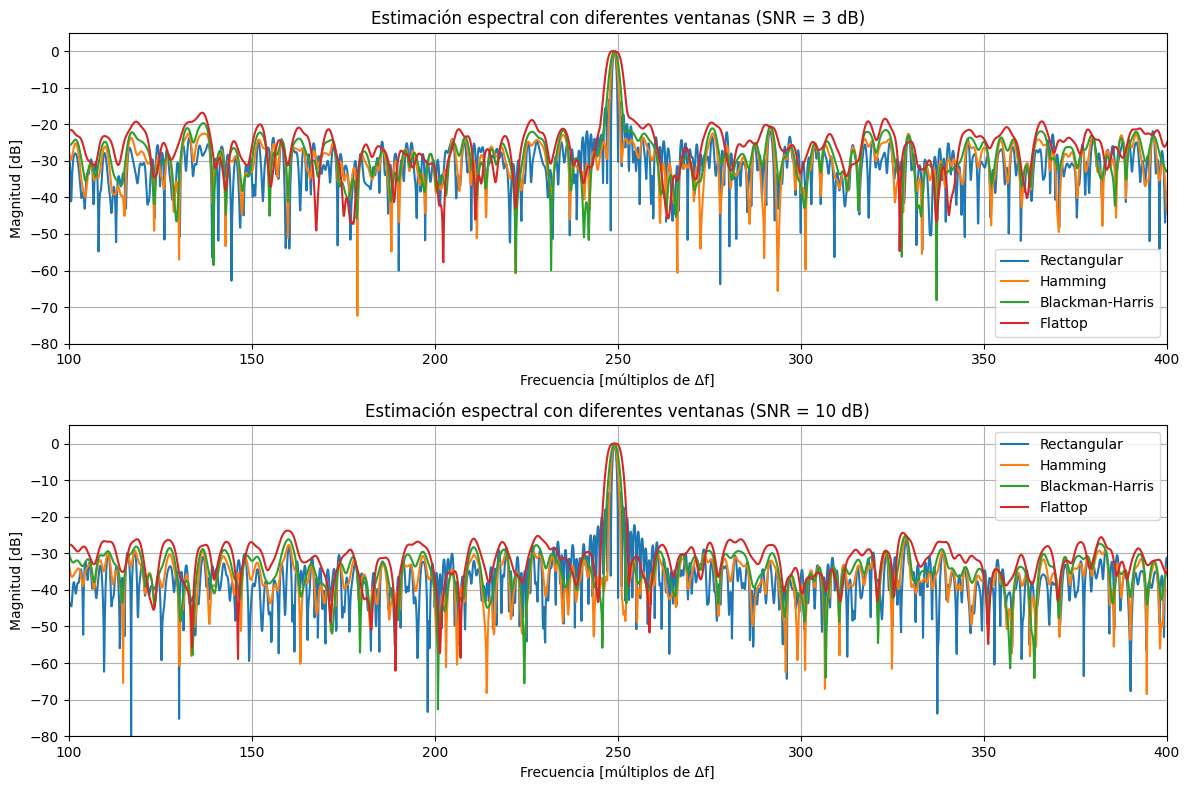

In [22]:
#%% Frecuencias para el eje
freqs = fftfreq(N*10, 1/fs)

def graficar(X, nombre):
    #X_shifted = fftshift(X)
    X_db = 20 * np.log10(np.abs(X) / np.max(np.abs(X)) + 1e-12)
    
    k = np.linspace(0, N, len(X_db), endpoint=False)
    plt.plot(k, X_db, label=nombre)

# Grafico SNR = 3 dB
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
graficar(XX_sen_ruido1[:, 0], "Rectangular")
graficar(XX_r1_ham[:, 0], "Hamming")
graficar(XX_r1_bh[:, 0], "Blackman-Harris")
graficar(XX_r1_fl[:, 0], "Flattop")
plt.title("Estimación espectral con diferentes ventanas (SNR = 3 dB)")
plt.xlabel("Frecuencia [múltiplos de Δf]")
plt.ylabel("Magnitud [dB]")
plt.ylim([-80, 5])
plt.xlim(100, 400)
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
graficar(XX_sen_ruido2[:, 0], "Rectangular")
graficar(XX_r2_ham[:, 0], "Hamming")
graficar(XX_r2_bh[:, 0], "Blackman-Harris")
graficar(XX_r2_fl[:, 0], "Flattop")
plt.title("Estimación espectral con diferentes ventanas (SNR = 10 dB)")
plt.xlabel("Frecuencia [múltiplos de Δf]")
plt.ylabel("Magnitud [dB]")
plt.ylim([-80, 5])
plt.xlim(100, 400)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Los gráficos permiten realizar una comparación entre las ventanas utilizadas y entre las diferentes condiciones de ruido. 
La ventana rectangular se caracteriza por presentar el lóbulo principal más estrecho, lo que le otorga la mejor resolución para distinguir componentes cercanas en frecuencia. En el extremo opuesto, la ventana Flat-top muestra el lóbulo principal más ancho, con lo cual su resolución es la más baja. En este sentido, el orden de resolución observado fue: rectangular, seguida por Hamming, luego Blackman-Harris y finalmente Flat-top.

En cuanto a la supresión de lóbulos laterales, la ventana rectangular resulta la menos favorable, ya que presenta lóbulos laterales con amplitud relativamente alta (alrededor de –14 dB), lo que incrementa la fuga espectral. En cambio, las otras ventanas ofrecen la mejor supresión, todas con lóbulos laterales en torno a –30 dB aproximadamente, reduciendo considerablemente el desparramo. 
Comparando los dos gráficos, se puede ver que esta supresión de lóbulos laterales se diferencia mucho mejor cuando el SNR es mayor. Cuando la relación señal-ruido es baja ($SNR = 3 dB$), el piso de ruido tiende a enmascarar los lóbulos laterales, dificultando la apreciación de las diferencias entre ventanas. En cambio, con un SNR mayor ($10 dB$), se logra una mejor definición de los lóbulos, lo que permite resaltar con mayor claridad las ventajas y limitaciones de cada tipo de ventana.

Luego se diseñaron estimadores de amplitud y de frecuencia, utilizando las ecuaciones (2) y (3), para cada ventana aplicada a cada ruido. También se muestran histogramas de ellos.



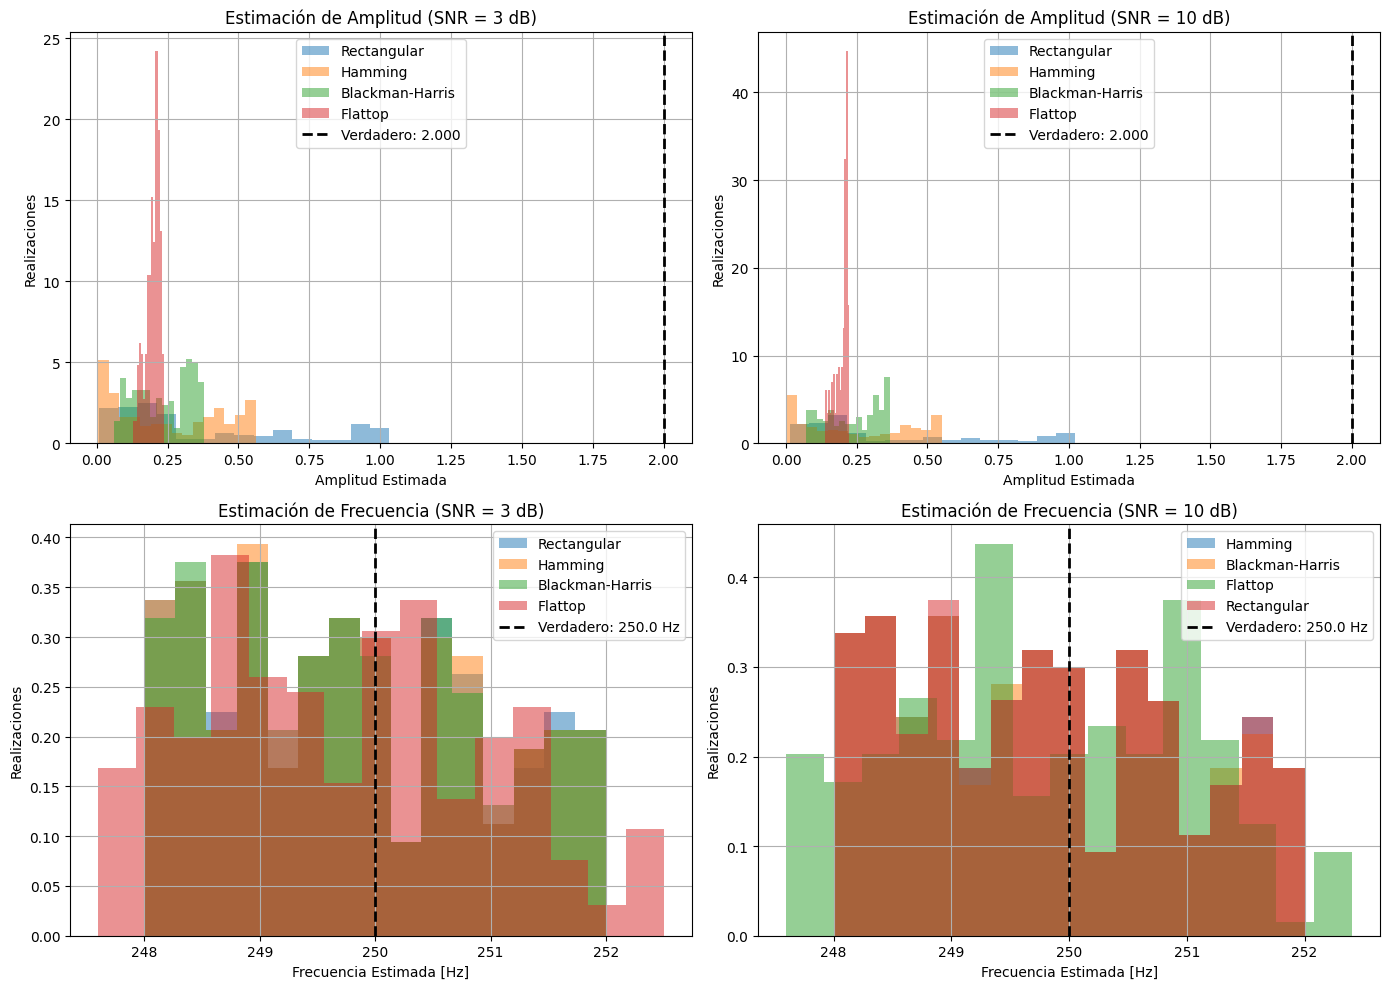

In [23]:
#%% Estimadores 
def estimar_amplitud_frecuencia(X_fft, frecuencias_fft, estadisticas=None, vent=None):
    # Encontrar índices de frecuencias de 0 a Nyquist
    fs_nyquist = fs / 2
    idx_nyquist = np.where((frecuencias_fft >= 0) & (frecuencias_fft <= fs_nyquist))[0]
    frecuencias_nyquist = frecuencias_fft[idx_nyquist]
    
    # Extraer solo el espectro de 0 a Nyquist para todas las realizaciones
    X_nyquist = X_fft[idx_nyquist, :]
    
    # Estimador de amplitud en Omega0 para todas las realizaciones
    idx_omega0 = np.argmin(np.abs(frecuencias_nyquist - Omega0))
    amplitudes = np.abs(X_nyquist[idx_omega0, :]) /N
    
    # Estimador de frecuencia: buscar máximo para cada realización
    idx_max = np.argmax(np.abs(X_nyquist), axis=0)
    frecuencias_estimadas = frecuencias_nyquist[idx_max]
    # Restar sesgo si se pasan estadísticas
    if estadisticas is not None and vent is not None:
        amplitudes = amplitudes - estadisticas[vent]['amplitud']['sesgo']
        frecuencias_estimadas = frecuencias_estimadas - estadisticas[vent]['frecuencia']['sesgo']
    return amplitudes, frecuencias_estimadas

# Aplicar estimadores a todas las ventanas
frecuencias_verdaderas = Omega0 + fr * deltaF

# SNR = 3 dB
a1_r1_rect, omega1_r1_rect = estimar_amplitud_frecuencia(XX_sen_ruido1, freqs)
a1_r1_ham, omega1_r1_ham = estimar_amplitud_frecuencia(XX_r1_ham, freqs)
a1_r1_bh, omega1_r1_bh = estimar_amplitud_frecuencia(XX_r1_bh, freqs)
a1_r1_fl, omega1_r1_fl = estimar_amplitud_frecuencia(XX_r1_fl, freqs)

# SNR = 10 dB
a1_r2_rect, omega1_r2_rect = estimar_amplitud_frecuencia(XX_sen_ruido2, freqs)
a1_r2_ham, omega1_r2_ham = estimar_amplitud_frecuencia(XX_r2_ham, freqs)
a1_r2_bh, omega1_r2_bh = estimar_amplitud_frecuencia(XX_r2_bh, freqs)
a1_r2_fl, omega1_r2_fl = estimar_amplitud_frecuencia(XX_r2_fl, freqs)

bins_freq = 15
transp = 0.5
# Graficamos histogramas
plt.figure(figsize=(14, 10))

# Amplitud SNR = 3 dB
plt.subplot(2, 2, 1)
plt.hist(a1_r1_rect, alpha=transp, bins=bins_freq, label="Rectangular", density=True)
plt.hist(a1_r1_ham,alpha=transp, bins=bins_freq, label="Hamming", density=True)
plt.hist(a1_r1_bh,alpha=transp, bins=bins_freq, label="Blackman-Harris", density=True)
plt.hist(a1_r1_fl,alpha=transp, bins=bins_freq, label="Flattop", density=True)
plt.axvline(a0, color='black', linestyle='--', linewidth=2, label=f'Verdadero: {a0:.3f}')
plt.title("Estimación de Amplitud (SNR = 3 dB)")
plt.xlabel("Amplitud Estimada")
plt.ylabel("Realizaciones")
plt.grid(True)
plt.legend()

# Amplitud SNR = 10 dB
plt.subplot(2, 2, 2)
plt.hist(a1_r2_rect, alpha=transp, bins=bins_freq, label="Rectangular", density=True)
plt.hist(a1_r2_ham,alpha=transp, bins=bins_freq, label="Hamming", density=True)
plt.hist(a1_r2_bh,alpha=transp, bins=bins_freq, label="Blackman-Harris", density=True)
plt.hist(a1_r2_fl,alpha=transp, bins=bins_freq, label="Flattop", density=True)
plt.axvline(a0, color='black', linestyle='--', linewidth=2, label=f'Verdadero: {a0:.3f}')
plt.title("Estimación de Amplitud (SNR = 10 dB)")
plt.xlabel("Amplitud Estimada")
plt.ylabel("Realizaciones")
plt.grid(True)
plt.legend()

# Histogramas de FRECUENCIA
# Frecuencia SNR = 3 dB 
plt.subplot(2, 2, 3)


plt.hist(omega1_r1_rect, alpha=transp, bins=bins_freq, label="Rectangular", density=True)
plt.hist(omega1_r1_ham, alpha=transp, bins=bins_freq, label="Hamming", density=True)
plt.hist(omega1_r1_bh, alpha=transp, bins=bins_freq, label="Blackman-Harris", density=True)
plt.hist(omega1_r1_fl, alpha=transp, bins=bins_freq, label="Flattop", density=True)
plt.axvline(Omega0, color='black', linestyle='--', linewidth=2, label=f'Verdadero: {Omega0:.1f} Hz')
plt.title("Estimación de Frecuencia (SNR = 3 dB)")
plt.xlabel("Frecuencia Estimada [Hz]")
plt.ylabel("Realizaciones")
plt.grid(True)
plt.legend()

# Frecuencia SNR = 10 dB 
plt.subplot(2, 2, 4)

plt.hist(omega1_r2_ham, alpha=transp, bins=bins_freq, label="Hamming", density=True)
plt.hist(omega1_r2_bh, alpha=transp, bins=bins_freq, label="Blackman-Harris", density=True)
plt.hist(omega1_r2_fl, alpha=transp, bins=bins_freq, label="Flattop", density=True)
plt.hist(omega1_r2_rect, alpha=transp, bins=bins_freq, label="Rectangular", density=True)
plt.axvline(Omega0, color='black', linestyle='--', linewidth=2, label=f'Verdadero: {Omega0:.1f} Hz')
plt.title("Estimación de Frecuencia (SNR = 10 dB)")
plt.xlabel("Frecuencia Estimada [Hz]")
plt.ylabel("Realizaciones")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

En los histogramas de amplitud se puede observar la calidad de los estimadores en términos de sesgo y varianza. Una distribución más estrecha refleja una menor varianza y, por lo tanto, un mejor desempeño estadístico. Si la distribución se encuentra centrada en torno al valor verdadero, el sesgo es reducido. En este sentido, se ve que la ventana Flat-top produce las distribuciones más concentradas, lo que la convierte en la más adecuada para estimaciones de amplitud precisa.

Por otro lado, los histogramas de frecuencia permiten evaluar la resolución en la estimación de la componente espectral. En este caso, una distribución más estrecha implica mayor precisión en la determinación de la frecuencia.

Las siguientes tablas muestran el sesgo, calculado con la ecuación (4), y la varianza de cada estimador para cada ventana analizada.


In [24]:
#%% Calcular estadísticas
def calcular_estadisticas(a1_estimado, omega1_estimado, a0_verdadera, omega_verdadero):
    # Estadísticas de amplitud
    mu_a1 = np.mean(a1_estimado)
    sesgo_a1 = mu_a1 - a0_verdadera
    varianza_a1 = np.var(a1_estimado)
    
    # Estadísticas de frecuencia
    mu_omega1 = np.mean(omega1_estimado)
    sesgo_omega1 = mu_omega1 - np.mean(omega_verdadero)
    varianza_omega1 = np.var(omega1_estimado)
    
    return {
        'amplitud': {'media': mu_a1, 'sesgo': sesgo_a1, 'varianza': varianza_a1},
        'frecuencia': {'media': mu_omega1, 'sesgo': sesgo_omega1, 'varianza': varianza_omega1}
    }

# Calcular estadísticas para SNR = 3 dB
estadisticas_ruido1 = {
    'Rectangular': calcular_estadisticas(a1_r1_rect, omega1_r1_rect, a0, frecuencias_verdaderas),
    'Hamming': calcular_estadisticas(a1_r1_ham, omega1_r1_ham, a0, frecuencias_verdaderas),
    'Blackman_harris': calcular_estadisticas(a1_r1_bh, omega1_r1_bh, a0, frecuencias_verdaderas),
    'Flattop': calcular_estadisticas(a1_r1_fl, omega1_r1_fl, a0, frecuencias_verdaderas)
}

# Calcular estadísticas para SNR = 10 dB
estadisticas_ruido2 = {
    'Rectangular': calcular_estadisticas(a1_r2_rect, omega1_r2_rect, a0, frecuencias_verdaderas),
    'Hamming': calcular_estadisticas(a1_r2_ham, omega1_r2_ham, a0, frecuencias_verdaderas),
    'Blackman_harris': calcular_estadisticas(a1_r2_bh, omega1_r2_bh, a0, frecuencias_verdaderas),
    'Flattop': calcular_estadisticas(a1_r2_fl, omega1_r2_fl, a0, frecuencias_verdaderas)
}


#%% Mostrar tablas
def mostrar_tabla(estadisticas, snr):
    print(f"\n{'='*80}")
    print(f"TABLA ESTADÍSTICA - SNR = {snr} dB")
    print(f"{'='*80}")
    
    print(f"\n{'ESTIMACIÓN DE AMPLITUD':^60}")
    print(f"{'-'*60}")
    print(f"{'Ventana':<15} {'Media':<12} {'Sesgo':<12} {'Varianza':<12}")
    print(f"{'-'*60}")
    
    for ventana, stats in estadisticas.items():
        amp = stats['amplitud']
        print(f"{ventana:<15} {amp['media']:>11.4f} {amp['sesgo']:>11.4f} {amp['varianza']:>11.4f}")
    
    print(f"\n{'ESTIMACIÓN DE FRECUENCIA':^60}")
    print(f"{'-'*60}")
    print(f"{'Ventana':<15} {'Media (Hz)':<12} {'Sesgo (Hz)':<12} {'Varianza':<12}")
    print(f"{'-'*60}")
    
    for ventana, stats in estadisticas.items():
        freq = stats['frecuencia']
        print(f"{ventana:<15} {freq['media']:>11.4f} {freq['sesgo']:>11.4f} {freq['varianza']:>11.4}")

# Mostrar tablas
mostrar_tabla(estadisticas_ruido1, SNR1)
mostrar_tabla(estadisticas_ruido2, SNR2)


TABLA ESTADÍSTICA - SNR = 3 dB

                   ESTIMACIÓN DE AMPLITUD                   
------------------------------------------------------------
Ventana         Media        Sesgo        Varianza    
------------------------------------------------------------
Rectangular          0.3671     -1.6329      0.1015
Hamming              0.2502     -1.7498      0.0362
Blackman_harris      0.2333     -1.7667      0.0091
Flattop              0.1973     -1.8027      0.0006

                  ESTIMACIÓN DE FRECUENCIA                  
------------------------------------------------------------
Ventana         Media (Hz)   Sesgo (Hz)   Varianza    
------------------------------------------------------------
Rectangular        249.7905      0.0013        1.33
Hamming            249.7905      0.0013       1.327
Blackman_harris    249.7915      0.0023       1.326
Flattop            249.7355     -0.0537        1.51

TABLA ESTADÍSTICA - SNR = 10 dB

                   ESTIMACIÓN DE AMPLITU

Los resultados numéricos confirman que en amplitud la ventana Flat-top alcanza la menor varianza, aunque con el mayor sesgo, mientras que la rectangular conserva el menor sesgo absoluto a costa de una varianza elevada. La Hamming y la Blackman-Harris ofrecen un compromiso intermedio. En la estimación de frecuencia, la Hamming y la Blackman-Harris presentan los sesgos más bajos, seguidas de cerca por la rectangular, mientras que la Flat-top resulta la menos adecuada debido a su mayor sesgo y varianza. De este modo, se verifica el compromiso entre precisión y consistencia según la ventana aplicada, con un desempeño especialmente favorable de la Hamming en frecuencia.


Con estos datos del sesgo, se pudieron realizar histogramas insesgados de la siguiente manera:

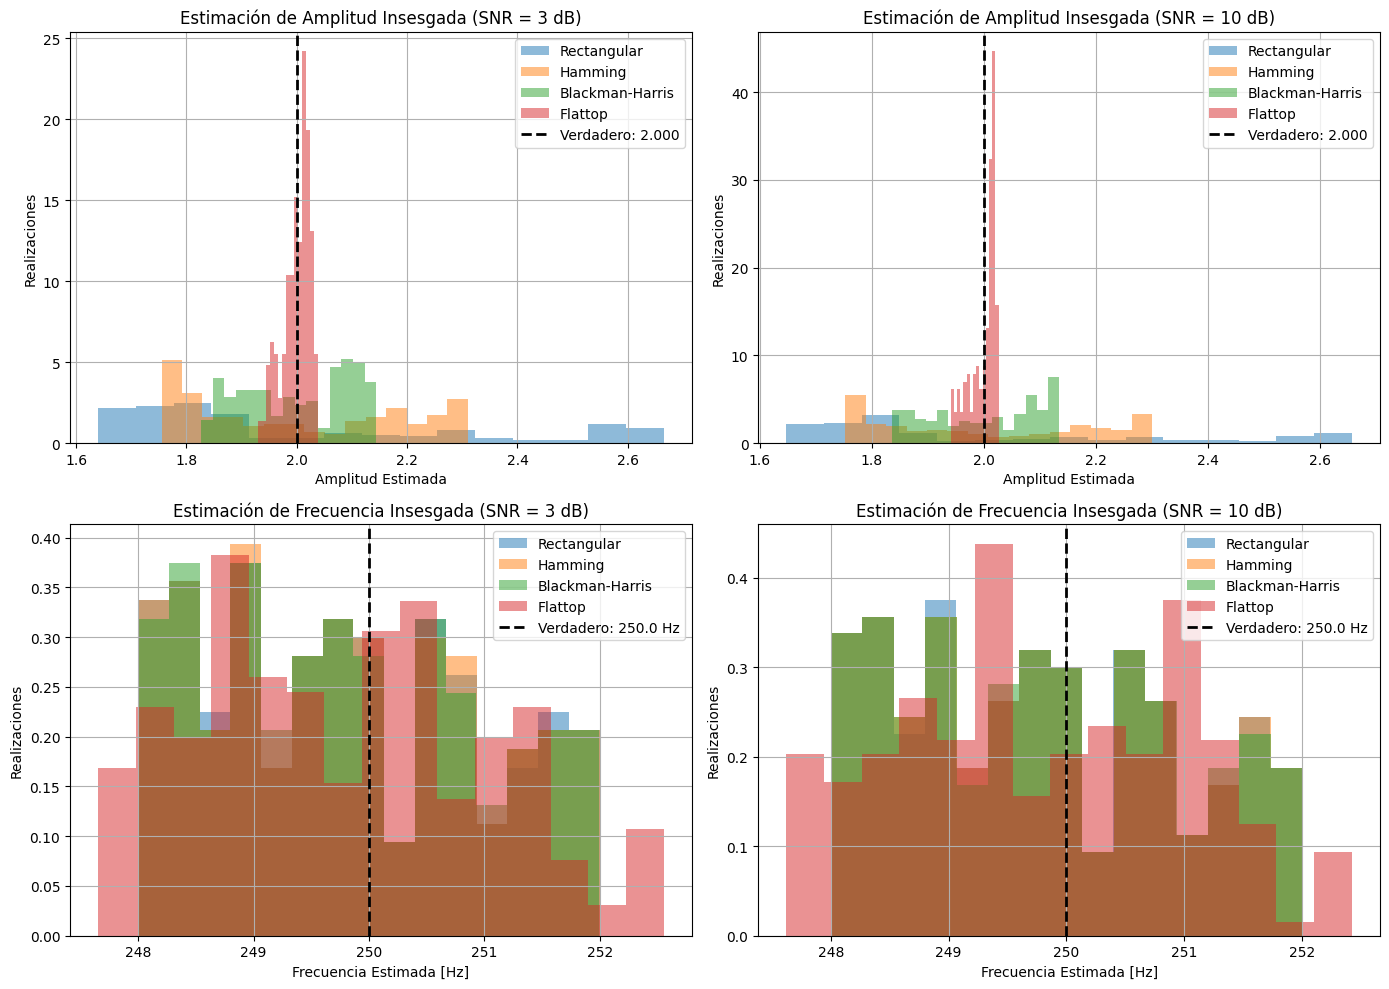

In [25]:
#%% Histogramas insesgados
# SNR = 3 dB
a1_r1_rect2, omega1_r1_rect2 = estimar_amplitud_frecuencia(XX_sen_ruido1, freqs, estadisticas_ruido1, 'Rectangular')
a1_r1_ham2, omega1_r1_ham2 = estimar_amplitud_frecuencia(XX_r1_ham, freqs, estadisticas_ruido1, 'Hamming')
a1_r1_bh2, omega1_r1_bh2 = estimar_amplitud_frecuencia(XX_r1_bh, freqs, estadisticas_ruido1, 'Blackman_harris')
a1_r1_fl2, omega1_r1_fl2 = estimar_amplitud_frecuencia(XX_r1_fl, freqs, estadisticas_ruido1, 'Flattop')

# SNR = 10 dB
a1_r2_rect2, omega1_r2_rect2 = estimar_amplitud_frecuencia(XX_sen_ruido2, freqs, estadisticas_ruido2, 'Rectangular')
a1_r2_ham2, omega1_r2_ham2 = estimar_amplitud_frecuencia(XX_r2_ham, freqs, estadisticas_ruido2, 'Hamming')
a1_r2_bh2, omega1_r2_bh2 = estimar_amplitud_frecuencia(XX_r2_bh, freqs, estadisticas_ruido2, 'Blackman_harris')
a1_r2_fl2, omega1_r2_fl2 = estimar_amplitud_frecuencia(XX_r2_fl, freqs, estadisticas_ruido2, 'Flattop')

bins_freq = 15
transp = 0.5
# Graficamos histogramas
plt.figure(figsize=(14, 10))

# Amplitud SNR = 3 dB
plt.subplot(2, 2, 1)
plt.hist(a1_r1_rect2, alpha=transp, bins=bins_freq, label="Rectangular", density=True)
plt.hist(a1_r1_ham2,alpha=transp, bins=bins_freq, label="Hamming", density=True)
plt.hist(a1_r1_bh2,alpha=transp, bins=bins_freq, label="Blackman-Harris", density=True)
plt.hist(a1_r1_fl2,alpha=transp, bins=bins_freq, label="Flattop", density=True)
plt.axvline(a0, color='black', linestyle='--', linewidth=2, label=f'Verdadero: {a0:.3f}')
plt.title("Estimación de Amplitud Insesgada (SNR = 3 dB)")
plt.xlabel("Amplitud Estimada")
plt.ylabel("Realizaciones")
plt.grid(True)
plt.legend()

# Amplitud SNR = 10 dB
plt.subplot(2, 2, 2)
plt.hist(a1_r2_rect2, alpha=transp, bins=bins_freq, label="Rectangular", density=True)
plt.hist(a1_r2_ham2,alpha=transp, bins=bins_freq, label="Hamming", density=True)
plt.hist(a1_r2_bh2,alpha=transp, bins=bins_freq, label="Blackman-Harris", density=True)
plt.hist(a1_r2_fl2,alpha=transp, bins=bins_freq, label="Flattop", density=True)
plt.axvline(a0, color='black', linestyle='--', linewidth=2, label=f'Verdadero: {a0:.3f}')
plt.title("Estimación de Amplitud Insesgada (SNR = 10 dB)")
plt.xlabel("Amplitud Estimada")
plt.ylabel("Realizaciones")
plt.grid(True)
plt.legend()

# Histogramas de FRECUENCIA
# Frecuencia SNR = 3 dB 
plt.subplot(2, 2, 3)


plt.hist(omega1_r1_rect2, alpha=transp, bins=bins_freq, label="Rectangular", density=True)
plt.hist(omega1_r1_ham2, alpha=transp, bins=bins_freq, label="Hamming", density=True)
plt.hist(omega1_r1_bh2, alpha=transp, bins=bins_freq, label="Blackman-Harris", density=True)
plt.hist(omega1_r1_fl2, alpha=transp, bins=bins_freq, label="Flattop", density=True)
plt.axvline(Omega0, color='black', linestyle='--', linewidth=2, label=f'Verdadero: {Omega0:.1f} Hz')
plt.title("Estimación de Frecuencia Insesgada (SNR = 3 dB)")
plt.xlabel("Frecuencia Estimada [Hz]")
plt.ylabel("Realizaciones")
plt.grid(True)
plt.legend()

# Frecuencia SNR = 10 dB 
plt.subplot(2, 2, 4)
plt.hist(omega1_r2_rect2, alpha=transp, bins=bins_freq, label="Rectangular", density=True)
plt.hist(omega1_r2_ham2, alpha=transp, bins=bins_freq, label="Hamming", density=True)
plt.hist(omega1_r2_bh2, alpha=transp, bins=bins_freq, label="Blackman-Harris", density=True)
plt.hist(omega1_r2_fl2, alpha=transp, bins=bins_freq, label="Flattop", density=True)

plt.axvline(Omega0, color='black', linestyle='--', linewidth=2, label=f'Verdadero: {Omega0:.1f} Hz')
plt.title("Estimación de Frecuencia Insesgada (SNR = 10 dB)")
plt.xlabel("Frecuencia Estimada [Hz]")
plt.ylabel("Realizaciones")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Por último, para completar el ejercicio Bonus, se aplicó zero padding en $Ω_{1}$con el objetivo de mejorar la resolución y, a partir de los nuevos datos, recalcular la frecuencia esperada.
Se espera que el resultado obtenido se aproxime más a la frecuencia original que el que proporciona el mismo estimador sin realizar el zero padding.
Para verificarlo, se implementó el siguiente código:


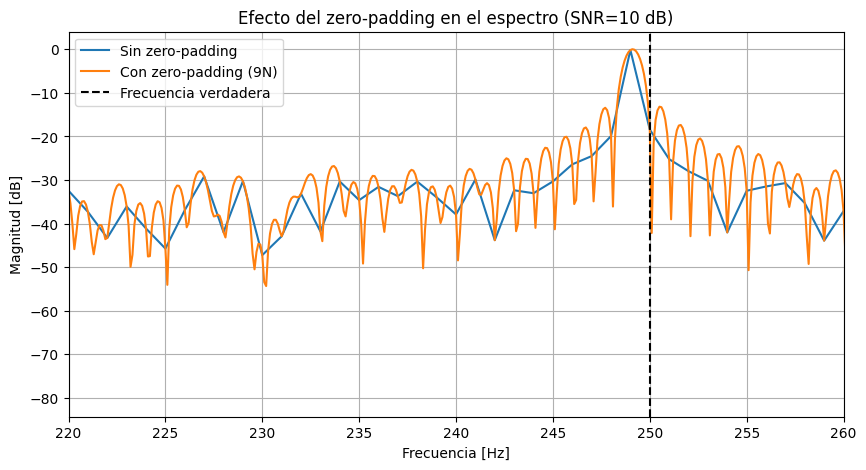

ANÁLISIS DEL EFECTO DEL ZERO-PADDING
Frecuencia verdadera: 249.1174 Hz
Frecuencia estimada SIN zero-padding: 249.0000 Hz
Frecuencia estimada CON zero-padding: 249.1000 Hz


In [26]:
#%% ================== ZERO PADDING ==================
# Señal con ruido (SNR=10 dB para el ejemplo)
x_test = xx_sen_ruido2[:, 0]

# FFT sin zero-padding
X_nozp = np.abs(fft(x_test, n=N)) / N
freq_nozp = np.arange(N) * fs / N

# FFT con zero-padding (9*N ceros -> total 10*N)
X_zp = np.abs(fft(x_test, n=10*N)) / N
freq_zp = np.arange(10*N) * fs / (10*N)

# Graficar comparación 
plt.figure(figsize=(10,5))
plt.plot(freq_nozp[:N//2], 20*np.log10(X_nozp[:N//2]), label="Sin zero-padding")
plt.plot(freq_zp[:10*N//2], 20*np.log10(X_zp[:10*N//2]), label="Con zero-padding (9N)")
plt.axvline(Omega0, color="k", linestyle="--", label="Frecuencia verdadera")
plt.title("Efecto del zero-padding en el espectro (SNR=10 dB)")
plt.xlim(220,260)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud [dB]")
plt.legend()
plt.grid(True)
plt.show()

# Búsqueda del máximo SOLO en frecuencias positivas (0 a Nyquist)
# Para sin zero-padding
freq_pos_nozp = freq_nozp[:N//2]  # Frecuencias de 0 a Nyquist
X_pos_nozp = X_nozp[:N//2]        # Magnitudes correspondientes

# Para con zero-padding
freq_pos_zp = freq_zp[:10*N//2]   # Frecuencias de 0 a Nyquist
X_pos_zp = X_zp[:10*N//2]         # Magnitudes correspondientes

# Encontrar el máximo solo en el rango positivo
idx_max_nozp = np.argmax(X_pos_nozp)
idx_max_zp = np.argmax(X_pos_zp)

freq_estimada_nozp = freq_pos_nozp[idx_max_nozp]
freq_estimada_zp = freq_pos_zp[idx_max_zp]

frecuencia_verdadera = Omega0 + fr[0] * deltaF  # Frecuencia verdadera para esta realización


print("="*60)
print("ANÁLISIS DEL EFECTO DEL ZERO-PADDING")
print("="*60)
print(f"Frecuencia verdadera: {frecuencia_verdadera:.4f} Hz")
print(f"Frecuencia estimada SIN zero-padding: {freq_estimada_nozp:.4f} Hz")
print(f"Frecuencia estimada CON zero-padding: {freq_estimada_zp:.4f} Hz")


Gracias a la salida del sistema, se puede verificar que la técnica de zero padding aproxima mejor al valor esperado de frecuencia.

Luego, se buscaron estimadores alternativos. Para ello, se reemplazaron los existentes que estiman la amplitud con la mediana y la frecuencia con la varianza, por otros estimadores que utilizan para amplitud la RMS (Root Mean Square) y para frecuencia interpolación cuadrática del máximo de la función en el intervalo de 0 a Nyquist.
El estimador RMS se basa en la relación entre el valor RMS de una señal sinusoidal y su amplitud pico. Para una señal sinusoidal pura $x(t)=A.sen(2.\pi.f.t+Ω)$, se cumple:
$$A_{RMS}=\frac{A_{pico}}{\sqrt{2}}$$
Por otro lado, el método de interpolación cuadrática se basa en ajustar una parábola a los tres puntos alrededor del máximo espectral.

In [27]:
#%% ================== ESTIMADORES ALTERNATIVOS ==================
def estimador_rms(x):
    """Estimador de amplitud en el dominio temporal usando RMS"""
    return np.sqrt(2) * np.sqrt(np.mean(x**2))

def estimador_qip(X, fs):
    """Estimador de frecuencia usando interpolación cuadrática del pico"""
    # Considerar solo frecuencias positivas (0 a Nyquist)
    n = len(X)
    X_pos = X[:n//2]  # Solo la mitad positiva del espectro
    
    k = np.argmax(np.abs(X_pos))
    if k == 0 or k == len(X_pos)-1:
        return k*fs/len(X)  # sin interpolación si es borde
    alpha = np.abs(X_pos[k-1])
    beta = np.abs(X_pos[k])
    gamma = np.abs(X_pos[k+1])
    p = 0.5*(alpha - gamma)/(alpha - 2*beta + gamma)
    k_interp = k + p
    return k_interp*fs/len(X)

# Probar con una realización
x_example = xx_sen_ruido2[:, 0]

# Amplitud temporal
amp_rms = estimador_rms(x_example)

# Frecuencia espectral con interpolación (usando zero-padding para mejor resolución)
X_example = fft(x_example, n=10*N)
freq_qip = estimador_qip(X_example, fs)

# Frecuencia verdadera para esta realización
frecuencia_verdadera = Omega0 + fr[0] * deltaF

print("\n=== Estimadores alternativos ===")
print(f"Amplitud RMS estimada: {amp_rms:.3f} (valor verdadero: {a0})")
print(f"Frecuencia estimada (QIP): {freq_qip:.3f} Hz (valor verdadero: {frecuencia_verdadera:.4f} Hz")
print(f"Frecuencia verdadera (realización): {frecuencia_verdadera:.3f} Hz")
print(f"Error de frecuencia: {abs(freq_qip - frecuencia_verdadera):.3f} Hz")


=== Estimadores alternativos ===
Amplitud RMS estimada: 2.108 (valor verdadero: 2)
Frecuencia estimada (QIP): 249.114 Hz (valor verdadero: 249.1174 Hz
Frecuencia verdadera (realización): 249.117 Hz
Error de frecuencia: 0.003 Hz


####  CONCLUSIÓN
En primer lugar, se observó que al agregar ruido a una señal, la recuperación de la información original se vuelve más compleja, ya que es necesario aplicar estimadores que solo permiten obtener una aproximación de la señal original en lugar de su valor exacto. Esto introduce cierta incertidumbre en las mediciones, especialmente cuando el SNR es bajo, momento en el cual los errores en amplitud y frecuencia aumentan y los picos espectrales se distorsionan. Con un SNR alto, la señal se preserva mejor y las estimaciones presentan menor error relativo.

En cuanto al análisis de sesgo y varianza en los estimadores de amplitud, se observó que las distintas ventanas afectan significativamente la precisión. Las ventanas con mayor supresión de lóbulos laterales, como la Flat-top, reducen la varianza del estimador, pero presentan un sesgo más elevado, suavizando las amplitudes reales de los picos. La ventana rectangular tiene el menor sesgo, aunque con una varianza considerablemente mayor, mientras que la ventana de Hamming ofrece un equilibrio adecuado entre sesgo y varianza.

Por otro lado, en los estimadores de frecuencia, la precisión depende del ancho del lóbulo principal de cada ventana. Las ventanas rectangular y Blackman-Harris fueron las más precisas en la localización de las frecuencias fundamentales, mientras que la Flat-top resultó menos adecuada debido a su lóbulo principal más ancho. La Blackman-Harris mostró la menor varianza, proporcionando estimaciones más estables ante ruido. Además, se verificó que el uso de zero padding mejora la resolución en frecuencia sin alterar la información de la señal.

#### AUTOEVALUACIÓN DEL APRENDIZAJE
Para llevar a cabo la tarea semanal nos juntamos y trabajamos juntas. Utilizamos la inteligencia artificial para poder imprimir las tablas y para ayudarnos a plantear sistemas de estimación alternativos para el último ejercicio. 
Nos cuesta entender el tema de estimadores y de sesgo. 

#### BIBLIOGRAFÍA
Holton, T. (2021). *Digital Signal Processing: Principles and Applications*. Cambridge University Press.
